In [39]:
% matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import newaxis
plt.style.use('ggplot')

In [40]:
def init():
    global R,V,F,W,Rs,Vs,Ws,time
    R[:,:] = 0.0
    V[:,:] = 0.0
    W[:,:] = 0.0
    F[:,:] = 0.0
    Rs[:,:,:] = 0.0
    Rs[0,:,:] = R[:,:]
    Vs[:,:,:] = 0.0
    Ws[:,:,:] = 0.0
    time[:] = 0.0
    title.set_text(r'')
    line.set_data([],[])
    line.set_3d_properties([])
    particles.set_data([],[])
    particles.set_3d_properties([])
    return particles,title,line

In [41]:
def animate(i):
    global R,V,W,F,Rs,Vs,Ws,time
    time[i]=i*dt
    particleforces()
    W = std*np.random.randn(nump,dim)
    V = (V*(1-zeta/2/m*dt)+F/m*dt+W/m)
    R = (R + (V*dt))
    Rs[i,:,:]=R
    Vs[i,:,:]=V
    Ws[i,:,:]=W
    title.set_text(r"t = "+str(time[i])+"/"+str((nums-1)*dt))
    line.set_data(Rs[:i+1,n,0],Rs[:i+1,n,1])
    line.set_3d_properties(Rs[:i+1,n,2])
    particles.set_data(pbc(R[:,0],box[0]),pbc(R[:.1],box[1]))
    particles.set_3d_properties(pbc(R[:,2],box[2]))
    return particles,title,line

In [42]:
def pbc(r,lbox):  # enforce periodic boundary conditions for all positions
    return np.fmod(r+lbox,lbox)

In [43]:
def distance(r1,r2,lbox):
    return r2-r1-np.around((r2-r1)/lbox)*lbox

In [44]:
def fij(r2,rij):
    f = -48*eps*((r2/sig**2)**(-6))/r2*rij # soft-core potential
    #f = -24*eps*(2(r2/sig**2)**(-6)-(r2/sig**2)**(-3))/r2*rij # Lennard
    return f

In [45]:
def particleforces():
    global F
    F[:,:]=0.0
    for n in range(nump):
        rij = distance(R[n,:],R,box)
        r2 = np.linalg.norm(rij,axis=1)**2
        nei = (r2<(2.0*sig)**2)
        nei[n] = False
        F[n,:] = np.sum(fij(r2[nei,newaxis],rij[nei,:]),axis=0)

In [46]:
def initconf():
    global R,V,W,F,Rs,Vs,Ws,time
    for n in range(nump):
        nn=0
        while nn==0:
            R[n,:]=np.random.rand(dim)*box
            nn = 1
            for l in range(n):
                rij = distance(R[n,:],R[1,:],box)
                r2 = np.linalg.norm(rij)**2 # calculate squared distance
                if r2 < (0.90*sig)**2: # check if distance < 2*sigma
                    nn = 0 # set overlap true

In [47]:
dim = 3
nump = 100
nums = 4096
dt = 0.01
zeta = 1
m = 1
kBT = 1
std = np.sqrt(2*kBT*zeta*dt)
sig = 1.0
eps = 1.0
vf = 0.001 # volume of fraction of particles < 0.45
box1 = np.power(nump*np.pi/6/vf,1/3)
print('Volume fraction =',vf,' box1 =',box1)
box = np.array([box1,box1,box1])*sig
np.random.seed(0)
R = np.zeros([nump,dim]) # array to store current position
V = np.zeros([nump,dim]) # array to store current velocity
W = np.zeros([nump,dim]) # array to store current random forces
F = np.zeros([nump,dim])
Rs = np.zeros([nums,nump,dim]) # array to store positions
Vs = np.zeros([nums,nump,dim]) # array to store velocities
Ws = np.zeros([nums,nump,dim]) # array to store random  forces
time = np.zeros([nums]) # array to store all time steps

Volume fraction = 0.001  box1 = 37.41101926818244


<IPython.core.display.Javascript object>


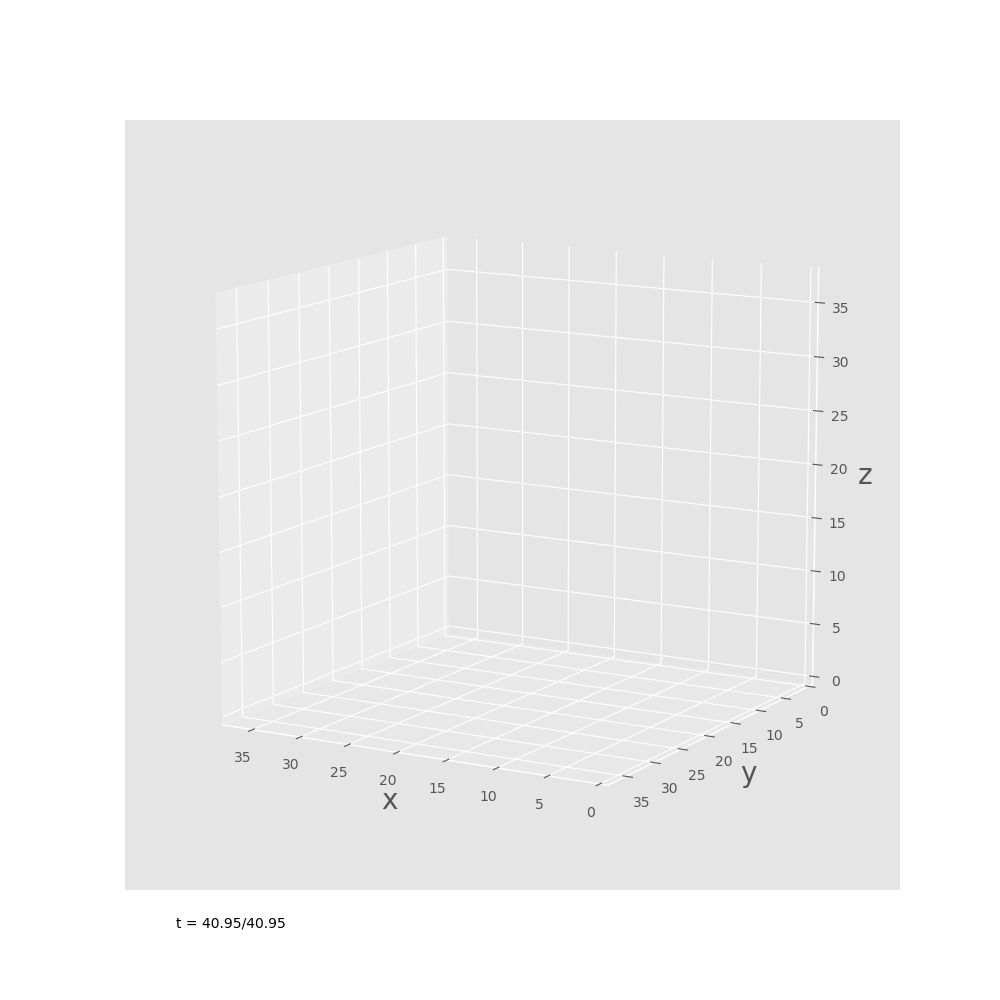

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(0.0,box[0])
ax.set_ylim(0.0,box[1])
ax.set_zlim(0.0,box[2])
ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
ax.set_zlabel(r"z", fontsize=20)
ax.view_init(elev=12,azim=120)
particles, = ax.plot([],[],[],linestyle='None',color='k',marker='o',ms=2,alpha=0.8)
title = ax.text(0.,0.,0.,r'',transform=ax.transAxes,va='center')
line, = ax.plot([],[],[],'b',lw=2,alpha=0.8)
n = 0
anim = animation.FuncAnimation(fig,func=animate,init_func=init,frames=nums,interval=5,blit=True,repeat=False)
#anim.save('BrownianMotion.mp4',fps=20,dpi=400)